# Imports

In [1]:
from pandas import read_csv
from matplotlib import pyplot as plt
import sys
import numpy as np
import pandas as pd
from datetime import datetime
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Variáveis Globais

In [3]:
exer=["1","2","3","4"]

file_path = "C:\\Users\\lopes\\Desktop\\Apple watch\\Exercicio"

users1=["AntonioC","GusC","DarC"]

repetition=["R1","R2","R3","R4"]

pesos=["3kg","5kg"]

# Funções Definidas

In [5]:
def getMedian(vs):
    if (len(vs)==0):
        return 0
    return (np.median(vs))

In [8]:
X = []
Y = []
CV_Pesos = []
CV_Utilizadores = []
CV_Repeticao = []
CV_Individual = []
Contagem = 0
tW=list(np.arange(-2.5,2.5+0.125,0.1))
tStep=0.1

for ixb, ex in enumerate(exer):
                for ixa,ps in enumerate(pesos):
                        for ixu,us in enumerate(users1):             
                            for ixc,cl in enumerate(repetition):       
                                print("Exer Nº",ex," the user user is ",us," try nº ",cl," peso: ",ps)
                                data_input = pd.read_csv(file_path+ex+"\\"+us+ex+"_"+cl+"_"+ps+".txt", skiprows=1, header=None, sep='\s+',
                                                         names=["TimeStep","Dias","Segundos","XACC","YACC","ZACC","XGYR","YGYR","ZGYR"])
                                tMax_input= data_input["Segundos"].iloc[-1]
                                data_output = pd.read_excel(file_path+ex+"\\"+us+ex+"_"+cl+"_"+ps+".xlsx",header=0,sheet_name='Serie 1')
                                tMax_output = data_output["Tiempo (s)"].iloc[-1]
                                offset_scene = float(open(file_path+ex+"\\"+us+ex+"_"+cl+"_"+ps+".txt").readline().split('=')[1])
                                print("Offset Inicial = ",offset_scene)
                                
                                print("Tempo Input = ",tMax_input," Tempo Output = ",tMax_output)
                                tMaxMin=min(tMax_input,tMax_output)
                 
                                for t in np.arange(0-min(tW),tMaxMin-max(tW),tStep): #len = 131
                                    xi=[]
                                       
                                    xi1=[]
                                    xi2=[]
                                    xi3=[]
                                    xi4=[]
                                    xi5=[]
                                    xi6=[]
                                    Tempos = []
                                    for it in range(0,len(tW)-2,1): #len = 50
                        
                                            tr=t
                        
                                            t0=tr+tW[it]
                                            tN=tr+tW[it+1]                                         
                                            ag1=data_input.iloc[np.where((data_input["Segundos"] >= t0+offset_scene ) & (data_input["Segundos"] <=  tN+offset_scene))]
                        
                                            Tempos.append(t0)
                                            Tempos.append(tN)
                        
                                            xi1.append(getMedian(ag1.iloc[:,3]))
                                            xi2.append(getMedian(ag1.iloc[:,4]))
                                            xi3.append(getMedian(ag1.iloc[:,5]))
                                            xi4.append(getMedian(ag1.iloc[:,6]))
                                            xi5.append(getMedian(ag1.iloc[:,7]))
                                            xi6.append(getMedian(ag1.iloc[:,8]))  
                                    
                                    xi.append(xi1)
                                    xi.append(xi2)
                                    xi.append(xi3)
                                    xi.append(xi4)
                                    xi.append(xi5)
                                    xi.append(xi6)
                                 
                                    # list of len 6,51 --> [[ACCX],[ACCY],[ACCZ],[GYRX],[GYRY],[GYRZ]]
                                    X.append(np.transpose(xi))
                                    Y.append(ixb)
                                    CV_Pesos.append(ixa)
                                    CV_Utilizadores.append(ixu)
                                    CV_Repeticao.append(ixc)
                                    CV_Individual.append(Contagem)
                                    
                                Contagem += 1 
                                print("----------------------------------")
                                                    #                            it = 49              """             it = 0
X=np.array(X)                                       # matrix t=1   [[ACCX,ACCY,ACCZ,GYRX,GYRX,GYRX],          , [ACCX,ACCY,ACCZ,GYRX,GYRX,GYRX]]
Y=np.array(Y)                                       #       """
CV_Pesos = np.array(CV_Pesos)                       #        t=max [[ACCX,ACCY,ACCZ,GYRX,GYRX,GYRX],          , [ACCX,ACCY,ACCZ,GYRX,GYRX,GYRX]]
CV_Utilizadores = np.array(CV_Utilizadores) 
CV_Repeticao = np.array(CV_Repeticao) 
CV_Individual = np.array(CV_Individual)
        
print(X.shape,Y.shape,CV_Pesos.shape,CV_Utilizadores.shape,CV_Repeticao.shape,CV_Individual.shape)

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\lopes\AppData\Local\Temp\ipykernel_14564\2780267345.py:16: SyntaxWarning: invalid escape sequence '\s'
  data_input = pd.read_csv(file_path+ex+"\\"+us+ex+"_"+cl+"_"+ps+".txt", skiprows=1, header=None, sep='\s+',


Exer Nº 1  the user user is  AntonioC  try nº  R1  peso:  3kg
Offset Inicial =  1.4000000000000012
Tempo Input =  37.525  Tempo Output =  34.684
----------------------------------
Exer Nº 1  the user user is  AntonioC  try nº  R2  peso:  3kg
Offset Inicial =  1.7000000000000015
Tempo Input =  37.574  Tempo Output =  34.312
----------------------------------
Exer Nº 1  the user user is  AntonioC  try nº  R3  peso:  3kg
Offset Inicial =  1.4000000000000012
Tempo Input =  36.143  Tempo Output =  33.261
----------------------------------
Exer Nº 1  the user user is  AntonioC  try nº  R4  peso:  3kg
Offset Inicial =  1.3000000000000012
Tempo Input =  37.149  Tempo Output =  34.192
----------------------------------
Exer Nº 1  the user user is  GusC  try nº  R1  peso:  3kg
Offset Inicial =  0.8000000000000007
Tempo Input =  28.364  Tempo Output =  25.972
----------------------------------
Exer Nº 1  the user user is  GusC  try nº  R2  peso:  3kg
Offset Inicial =  0.9000000000000008
Tempo Inp

In [9]:
Y=to_categorical(Y)

In [10]:
def ResultadosClassificacao(X,Y,S):
        for ixs,sc in enumerate(np.unique(S)):
            
            train_index=np.where(S != sc)[0]
            test_index=np.where(S == sc)[0]
        
            np.random.shuffle(train_index)
            
            print("SCENE", sc, " TRAIN:", train_index, " TEST:", test_index)
            x_train, x_val = np.copy(X[train_index]), np.copy(X[test_index])
            y_train, y_val = np.copy(Y[train_index]), np.copy(Y[test_index])
        
            for ixv in range(0,X.shape[2]):
                min_v=min(x_train[:,:,ixv].flatten())
                max_v=max(x_train[:,:,ixv].flatten())
                print("min_v,max_v:",min_v,max_v,x_train[:,:,ixv])
                x_train[:,:,ixv]=(x_train[:,:,ixv]-min_v)/(max_v-min_v)
                x_val[:,:,ixv]=(x_val[:,:,ixv]-min_v)/(max_v-min_v)
            
            model = Sequential([
                Input(shape=(X.shape[1], X.shape[2])),  
                Conv1D(filters=16, kernel_size=2, activation='relu'),
                Conv1D(filters=32, kernel_size=3, activation='relu'),
                Dropout(0.25),
                Conv1D(filters=64, kernel_size=3, activation='relu'),
                Conv1D(filters=128, kernel_size=3, activation='relu'),
                Dropout(0.25),
                LSTM(256, return_sequences=True),
                Dropout(0.25),
                LSTM(256),
                Flatten(),
                Dense(2048, activation='relu'),
                Dense(1024, activation='relu'),
                Dense(4, activation='softmax') 
            ])
            
            model.compile(loss='categorical_crossentropy', optimizer='rmsprop',  metrics=['accuracy'])
            
            history = model.fit(x_train, y_train, batch_size=16, epochs=30, validation_data=(x_val, y_val))
  
            y_pred = model.predict(x_val).argmax(axis=1)
            y_val=y_val.argmax(axis=1)
            
            cm = confusion_matrix(y_val, y_pred) 
            print(cm)
            print('Classification Report SCENE ',sc)
            print(classification_report(y_val, y_pred, target_names=exer))
            
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=exer)  
            disp.plot(cmap=plt.cm.Blues)
            plt.show()


# Cross Validation Pesos

SCENE 0  TRAIN: [20410  3635  3570 ... 14707 19882  9819]  TEST: [    0     1     2 ... 18286 18287 18288]
min_v,max_v: -10.30337429 17.3195848465 [[ 0.65503788 -0.09819581 -0.76880133 ... -2.79977787 -3.79251361
  -3.97932506]
 [ 5.56123543  4.31103516  3.06682265 ...  1.26217532  0.91968754
   0.48858401]
 [ 9.59684372 10.50216103  8.2448554  ...  6.34201193  8.1993494
   9.29147863]
 ...
 [ 0.20836671 -0.73886356 -0.55564457 ... -0.98914307 -1.15559697
  -2.09803724]
 [-0.66940799 -1.32444584 -1.02985847 ...  0.93645269  0.52450931
  -0.64665529]
 [ 2.80576551  4.02483046  0.22153932 ...  2.38783455  3.38536024
   2.88839364]]
min_v,max_v: -36.39950943 25.296197891 [[-11.91522264  -8.7035017   -8.78493214 ... -10.99553537 -10.71172571
   -7.64250755]
 [ -8.37059403  -7.90116978  -8.44483948 ...  -9.43158722  -9.31303358
   -9.60642338]
 [ -9.11304951 -10.00878716 -10.99433804 ... -11.81942177  -8.24485493
   -7.62694001]
 ...
 [ -9.5992384   -9.69863224  -9.46990776 ... -10.5608387 

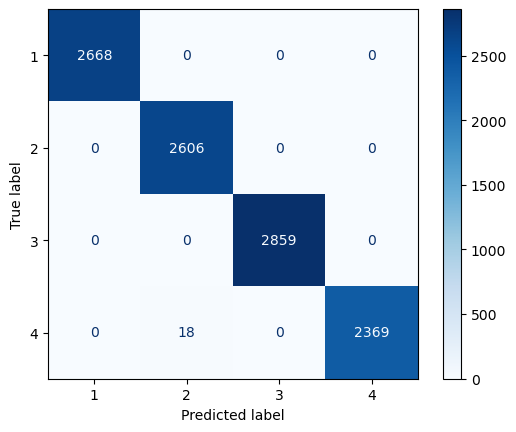

SCENE 1  TRAIN: [17501  6126  6612 ... 10732   784 12575]  TEST: [ 2668  2669  2670 ... 20621 20622 20623]
min_v,max_v: -8.626860619 14.942527771 [[-1.93158329 -1.07296884 -1.89925057 ... -1.74117923 -1.09212893
  -1.14481938]
 [-2.60697889 -5.24748802 -5.74325705 ... -4.29187512 -4.43797135
  -3.72186041]
 [ 3.424878    4.06195331  4.59843779 ...  3.58773947  2.87282598
   0.11615845]
 ...
 [-6.79706574 -5.49417496 -3.02969992 ... -2.54111576 -2.33993411
  -1.43222177]
 [ 0.1089734  -0.34727785 -1.04901862 ... -0.92208256 -1.12565923
  -0.92567509]
 [ 0.4754114   0.41194338  0.9484278  ... -0.54127443 -1.82021493
  -1.39270395]]
min_v,max_v: -29.578493118 14.4587335585 [[ -9.38488436  -9.97525692 -11.36317062 ... -10.65783691  -8.96216345
  -10.06626749]
 [ -0.62150762   0.43110353   0.68976563 ...  -4.72896624  -8.00176048
   -9.77167988]
 [ -9.0771246   -9.34416914 -10.28660965 ... -12.90197086 -10.76800823
   -8.68314362]
 ...
 [ -9.91178846  -8.8951025   -9.2495656  ...  -9.026828

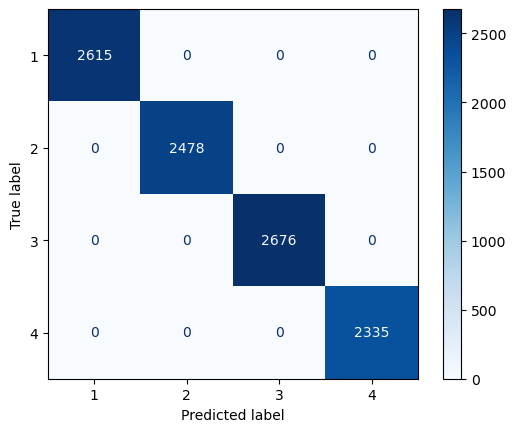

In [12]:
ResultadosClassificacao(X,Y,CV_Pesos)

# Cross Validation Utilizadores

SCENE 0  TRAIN: [20075 17718  2352 ... 12868  7385 17708]  TEST: [    0     1     2 ... 19260 19261 19262]
min_v,max_v: -10.30337429 17.3195848465 [[ 0.05029541  0.29698244 -0.22513184 ... -1.10889411 -0.90411991
  -0.98914313]
 [-3.71467543 -4.42120647 -3.69431782 ...  0.86699712  1.09931397
   1.12326419]
 [ 2.03337169  0.66342044  0.73048097 ...  8.77056169  7.34313011
   7.0712955 ]
 ...
 [-0.68737066  1.44060427  2.70277965 ... -2.85486341  0.62150759
  -0.5508545 ]
 [ 3.09676039  4.1840992   2.66805196 ... -3.07041526 -3.17819107
  -0.30416748]
 [-0.91250247 -0.30177247 -0.29937746 ... -0.56402713 -2.69439703
  -4.24636984]]
min_v,max_v: -36.39950943 25.296197891 [[-10.20517874  -9.44116735  -9.73575497 ...  -7.79578877 -10.28541183
   -9.15376473]
 [ -7.7574687   -8.37059403  -9.42919207 ... -12.3439312  -11.66374588
   -9.99681187]
 [ -7.13715839  -2.50279546  -4.10506344 ... -12.47565699 -13.21332359
  -12.80976248]
 ...
 [ -7.90595961 -11.1045084   -9.70102692 ...  -8.7933144

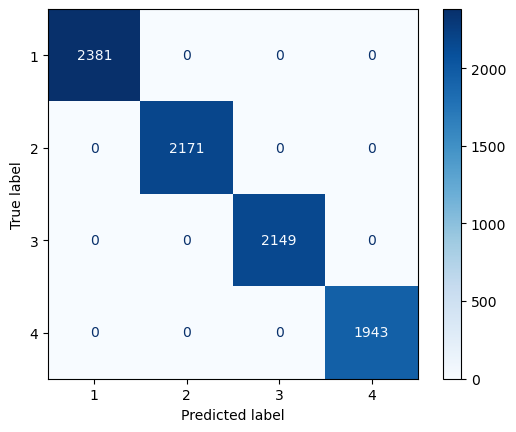

SCENE 1  TRAIN: [ 2283 13409 17862 ...  8882 10531  3376]  TEST: [ 1162  1163  1164 ... 20129 20130 20131]
min_v,max_v: -10.30337429 17.3195848465 [[ 2.41178489  1.0322535   2.19383788 ...  8.14546204  7.65807533
   7.04375267]
 [-4.49066162 -3.07760024 -2.58662128 ... -1.78668463 -1.65495861
  -1.48251712]
 [-2.01900148 -1.91721326 -3.71467543 ...  2.19623303  1.03464854
   0.86699712]
 ...
 [ 2.20820808  2.03337169  1.17595464 ... -0.00958008 -0.06227051
  -2.37106943]
 [-3.90388203 -2.92431903 -2.66924942 ... -3.5266664  -2.82372808
  -3.04047751]
 [ 0.75562871  0.55803955  0.10298584 ... -0.22513184 -0.51013917
  -0.55803955]]
min_v,max_v: -36.39950943 25.296197891 [[  9.2256155  -14.61680508  -3.70030522 ... -11.13444614 -13.18458319
  -13.04567242]
 [ -8.67955112  -9.9058013   -9.79802513 ...  -9.47948742  -9.18729496
   -9.60163403]
 [ -8.41609859  -7.91074967  -7.7574687  ... -10.42073059 -11.52483463
  -12.3439312 ]
 ...
 [-13.32349443 -13.81926346 -15.07425356 ...  -7.9933779

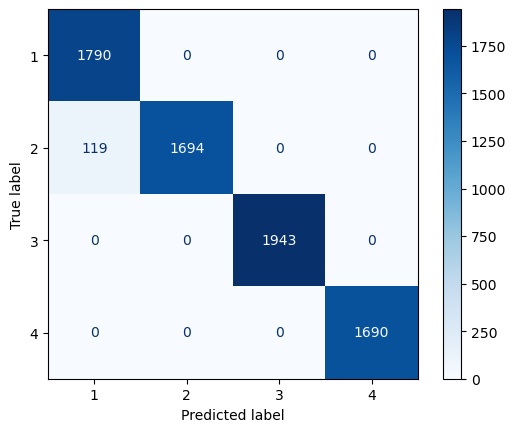

SCENE 2  TRAIN: [11198  2886 19547 ... 17433  8238 11586]  TEST: [ 2001  2002  2003 ... 20621 20622 20623]
min_v,max_v: -8.168214321499999 15.065871239 [[-2.8273207  -4.15416169 -3.91705465 ... -1.94475591 -0.36045045
   1.93757093]
 [-0.67060548 -1.48970223 -1.71124148 ...  0.06706055 -0.03353027
  -0.62629765]
 [-1.29570568 -1.27175546 -1.76512951 ... -1.038241   -0.99632818
  -0.44667116]
 ...
 [-1.4585669  -1.52562749  0.57240969 ... -0.39038819 -1.15799201
  -1.52443004]
 [ 1.5867005   1.44778937  1.63100839 ...  1.58550298  1.60346568
   0.73766607]
 [ 0.75443119  0.59635991  0.79155397 ...  1.13883185  0.23471193
  -0.21076173]]
min_v,max_v: -18.074015617500002 4.660708427 [[ -8.98491573  -8.64961338  -8.66877317 ... -11.03385544  -9.39805698
   -8.32269287]
 [ -9.30465126 -10.04231739  -9.96687412 ...  -9.52738857  -9.96208382
   -9.22202301]
 [-10.39438534  -9.2423811   -9.98363924 ...  -9.41122961  -9.19208527
   -8.92863321]
 ...
 [-10.88775921 -10.42312527  -8.48555469 ... 

C:\Users\lopes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lopes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lopes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


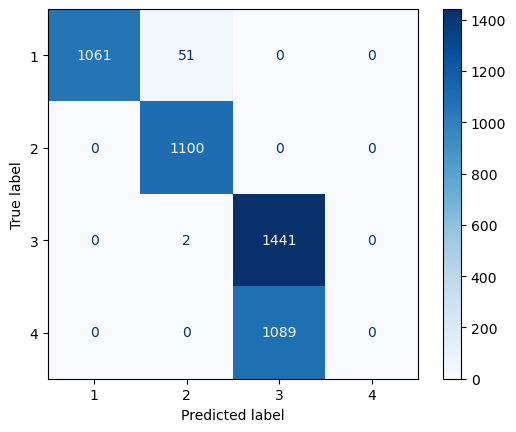

In [14]:
ResultadosClassificacao(X,Y,CV_Utilizadores)

# Cross Validation Repeticoes 

SCENE 0  TRAIN: [ 7572 16566 17584 ... 16138 20561   670]  TEST: [    0     1     2 ... 20269 20270 20271]
min_v,max_v: -10.30337429 17.3195848465 [[ 3.74820566  0.732876   -1.83458507 ...  1.51724494  4.79482937
   1.93637341]
 [-1.74117923 -1.83458507 -2.25850344 ... -2.55668342 -2.63691664
  -2.52914071]
 [-0.65144533 -1.26936042 -0.71132082 ... -1.40108645 -2.13875246
  -1.53760266]
 ...
 [-0.51732425 -1.69088387  0.82628179 ... -2.39861214 -2.62853408
  -2.48124027]
 [ 0.28141481 -0.27303225  1.07775879 ... -4.38168836 -2.76145768
  -2.90036869]
 [-0.78077638 -1.23104012 -1.46096194 ... -0.16166383 -1.52442998
  -0.86220706]]
min_v,max_v: -36.39950943 25.296197891 [[-11.00271988  -3.12789559   1.67172372 ... -19.08112145 -12.09963894
  -18.38776302]
 [ -8.50471497  -8.48315954  -8.25802803 ...  -9.59085607  -8.44483948
   -9.09388924]
 [ -9.37889671 -10.03752708 -10.56682682 ...  -9.30704594 -10.09021759
   -8.91905308]
 ...
 [ -7.86763954 -10.49976635 -11.49130392 ...  -8.1658191

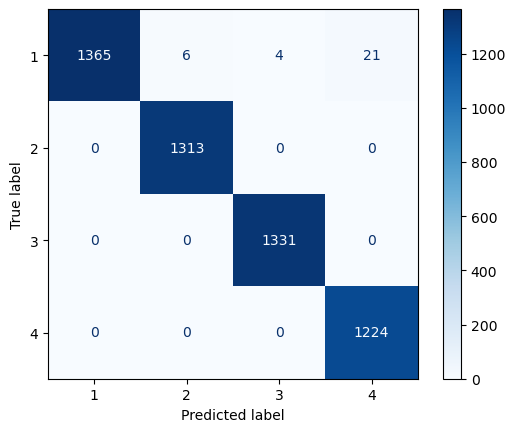

SCENE 1  TRAIN: [ 9045  9837  9892 ... 11107 11932 16758]  TEST: [  296   297   298 ... 20389 20390 20391]
min_v,max_v: -10.30337429 17.3195848465 [[-0.28979736 -0.99632815 -2.52435064 ...  3.09795797  2.6273365
   2.39262462]
 [ 2.67763186  3.25243664  1.06817874 ...  3.49912357  3.93621469
   3.23327661]
 [ 0.0981958   1.46814704  2.72553229 ...  5.12174964  0.65863042
  -0.73287603]
 ...
 [-2.7782228  -1.91362071 -0.01676514 ... -3.29075694 -5.17084742
  -5.87258816]
 [-0.37242556  0.61552006  0.25985964 ... -2.30161381 -1.73519176
   0.1820215 ]
 [-2.54830098 -2.42854989 -2.61536145 ... -2.63811421 -1.44659185
  -1.31965584]]
min_v,max_v: -36.39950943 25.296197891 [[ -6.62582183  -4.54095721  -0.78556645 ... -10.95721483 -11.7523613
  -13.22290325]
 [-13.16542339 -13.51988602 -10.66382504 ... -10.07105732  -9.93573904
   -8.0903759 ]
 [ -2.6500892   -6.68210459 -15.71611881 ... -13.38217258  -7.06171513
    1.4418018 ]
 ...
 [ -9.3429718   -9.21603584  -9.58965874 ...  -9.26633072 

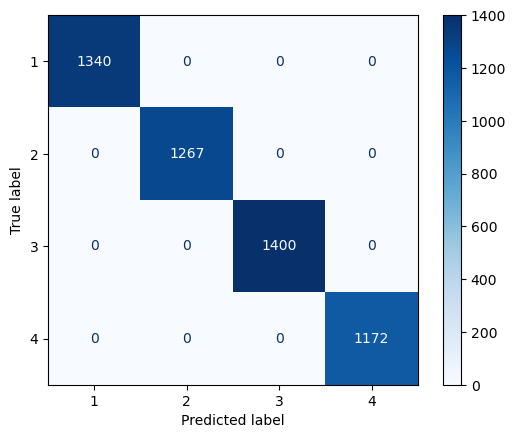

SCENE 2  TRAIN: [ 9746  2272  9153 ... 10433 19699  8011]  TEST: [  589   590   591 ... 20508 20509 20510]
min_v,max_v: -10.30337429 17.199833869499997 [[ 2.85725832  3.68713272  2.00702643 ...  1.59508312  1.57352787
   1.73399425]
 [ 0.95082277  3.07640278  5.14929199 ...  7.74788857  8.65799618
   8.23767042]
 [-2.6908046  -3.58055425 -2.43453741 ...  2.80935812  4.0894959
   2.97700942]
 ...
 [-1.22026253 -2.16988778 -3.54343152 ... -6.01868439 -6.05221462
  -6.57193375]
 [-0.05508545 -0.49337405  0.22872438 ... -0.86939213 -2.91234398
  -2.28484869]
 [ 1.77710462  1.85973275  1.31247079 ... -1.57592297 -3.03927994
  -3.50630879]]
min_v,max_v: -36.39950943 18.333875656500002 [[-12.15951443 -13.80010319 -13.10794258 ... -11.62542534 -12.03617096
  -12.76784992]
 [ -4.90260506  -5.93366098  -9.51062298 ... -13.00256157 -10.38720036
   -8.01613069]
 [ -0.37003052  -4.58406735  -5.85223055 ... -11.18474197  -9.91538143
  -13.67077208]
 ...
 [ -9.50942516  -9.4076376  -10.36325026 ...  

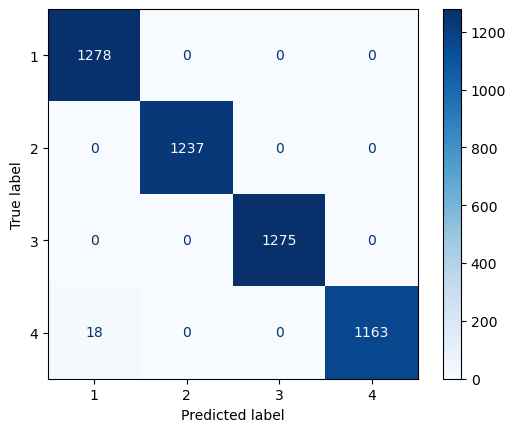

SCENE 3  TRAIN: [ 3118 13410   424 ...  4602 11632 12524]  TEST: [  871   872   873 ... 20621 20622 20623]
min_v,max_v: -9.122630119499998 17.3195848465 [[ 8.82804251  5.12294722  7.87961459 ...  2.12438238  5.64985132
   8.21970749]
 [-3.07760024 -2.58662128 -1.88009036 ... -1.65495861 -1.48251712
  -2.6345216 ]
 [-0.31135255 -0.79155397 -1.35558116 ... -0.2203418  -0.14849122
  -0.64186525]
 ...
 [ 1.85374516  1.90643561  0.35206789 ... -0.49337405  0.08143067
   2.98060203]
 [ 0.60354495  1.13883185  0.23471193 ...  0.63947023  0.72569096
  -0.7592212 ]
 [ 2.53752327  1.95194101 -2.09803718 ...  0.28740236  1.66693366
   2.15671521]]
min_v,max_v: -29.578493118 25.296197891 [[-10.98356009 -12.40380669  -8.14306688 ...  -7.32995749  -7.81255388
   -9.88903618]
 [ -9.9058013   -9.79802513  -8.91426277 ...  -9.18729496  -9.60163403
   -8.72864914]
 [ -8.90947342  -9.46392012  -9.26872635 ...  -8.79211712  -8.55500984
   -9.03401375]
 ...
 [ -8.23647237  -6.65575933  -6.06658459 ...  -6.

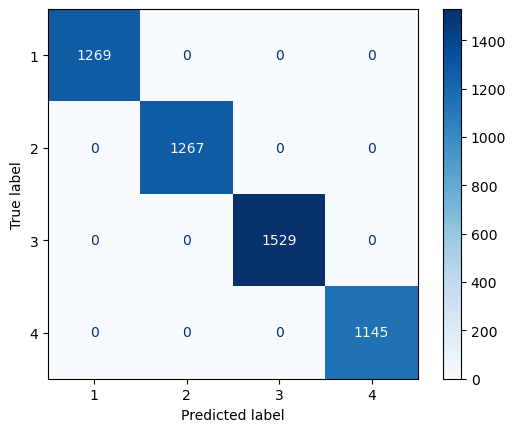

In [16]:
ResultadosClassificacao(X,Y,CV_Repeticao)